In [5]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Referencias recomendadas

Para comprender y repasar mas al respecto, la recomendación es que se base en el libro **Introduction to Probability for Data Science** de [Stanley H. Chan](https://engineering.purdue.edu/ChanGroup/stanleychan.html) el cual se encuentra en el siguiente link [link](https://probability4datascience.com/index.html). Mas exactamente los capitulos de interes son:
* **Chapter 3 - Discrete Random Variables** ([link](https://probability4datascience.com/ch03.html)) 
* **Chapter 4 Continuous Random Variables** ([link](https://probability4datascience.com/ch04.html)) 

## Ejemplos de VA

1. Generar $N$ numeros aleatorios entre 0 y 1 usando una distribución uniforme.


**Solución**: Se hará la simulación empleando una distribución de uniforme ([scipy.stats.uniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html))

Percentil[0]: 0.001
Percentil[50]: 0.5
Percentil[100]: 0.999


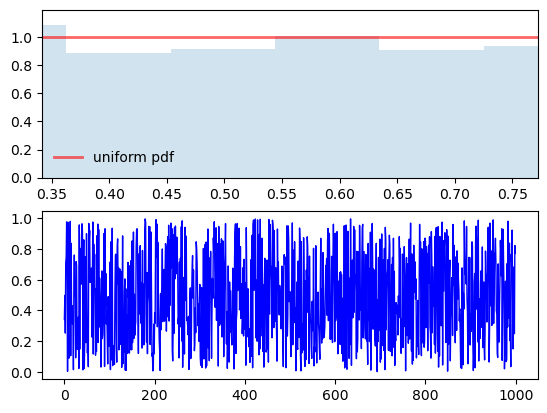

In [63]:
"""
Para entrada de usuario
N = int(input("Candidad de numeros a generar: "))
a = int(input("Limite inferior: "))
b = int(input("Limite superior: "))
"""

""" --- Creación de la VA uniforme ---
X ~ U(a = 0, b = 23)
"""

"""
Definición de la VA Uniforme: X ~ U(a = 0, b = 23)

X: Numero a generar
- a: Valor minimo
- b: Valor maximo
"""
a = 0
b = 1
X = stats.uniform(loc=a, scale=b)

# Percentiles (Usar la función ppf)
vals = X.ppf([0.001, 0.5, 0.999])
print(f"Percentil[0]: {vals[0]}")
print(f"Percentil[50]: {vals[1]}")
print(f"Percentil[100]: {vals[2]}")

# Grafica
fig, (ax1, ax2) = plt.subplots(2)
x = np.linspace(X.ppf(0.01), X.ppf(0.99), 100) #
ax1.plot(x, X.pdf(x),
       'r-', lw=2, alpha=0.6, label='uniform pdf')

# Simulación
N = 1000 # Numero de corridas (Simulaciones)
random_numbers = X.rvs(size=N)
# print(random_numbers)

# Grafica de los numeros aleatorios generados
ax2.plot(random_numbers,'b-', lw=1) 

# Histograma
ax1.hist(random_numbers, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax1.set_xlim([random_numbers[0], random_numbers[-1]])
ax1.legend(loc='best', frameon=False)

plt.show()


2. Simular el lanzamiento de una moneda (Para mas información ver el siguiente [link](https://medium.com/geekculture/how-to-simulate-coin-flips-using-binomial-distribution-in-python-165aae7daf22)). Para este caso, suponga que $X$ es una variable aleatoria binaria que toma el valor de 1 cuando cae cara (**H**) y toma el valor de 0 cuando case sello (**T**). Ademas que se asume la caida de cara como exito y la caida de sello como fracaso. Suponiendo los siguientes escenarios:
   * **Moneda legal**: $p = q = 0.5$ 
   * **Moneda cargada**: $p = 0.7, q = 0.3$ 

**Solución**: Se hará la simulación empleando una distribución de Bernoulli ([scipy.stats.bernoulli](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html))

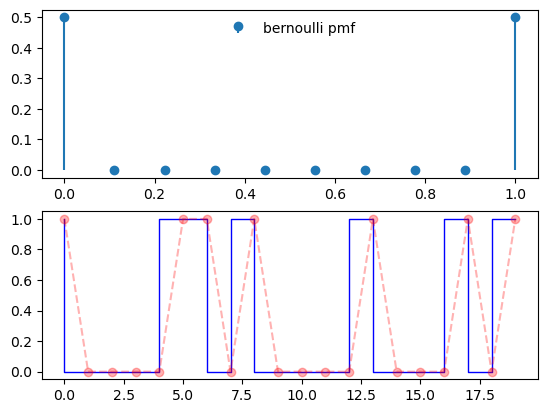

In [62]:
# Caso 1: Moneda legal (p = q = 0.5)

"""
Definición de la VA Bernulli: M ~ Bern(p)

M: Salida de la moneda (S: Cara, F: Sello)
- p = 0.5 
"""
p_H = 0.5
M = stats.bernoulli(p = p_H)


# Grafica
fig, (ax1, ax2) = plt.subplots(2)
m = np.linspace(M.pmf(0.01), M.ppf(0.99), 10) #
ax1.stem(m, M.pmf(m),label='bernoulli pmf', basefmt=" ")
#ax1.plot(m, M.pmf(m), 'bo', ms=5, label='bernoulli pmf')
#ax1.vlines(m, 0, M.pmf(m), colors='b', lw=5, alpha=0.5)

# Simulación
N = 20 # Numero de corridas (Simulaciones)
coin_flip = M.rvs(size=N)
# print(random_numbers)

# Grafica de los numeros aleatorios generados
ax2.step(coin_flip,'b-', lw=1) 
ax2.plot(coin_flip, 'o--', color='red', alpha=0.3)

# Histograma
#ax1.hist(coin_flip, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
#ax1.set_xlim([coin_flip[0], coin_flip[-1]])
ax1.legend(loc='best', frameon=False)

plt.show()


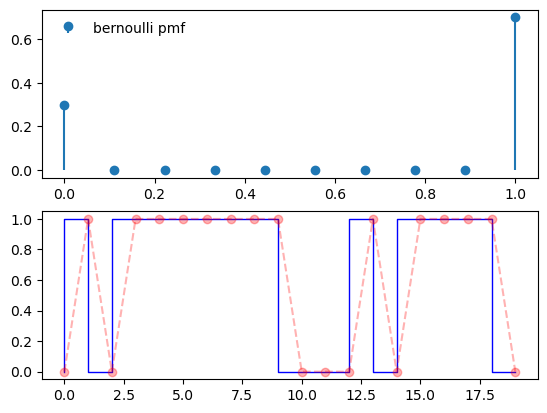

In [64]:
# Caso 2: Moneda cargada (p = 0.7; q = 0.3)

"""
Definición de la VA Bernulli: M ~ Bern(p)

M: Salida de la moneda (S: Cara, F: Sello)
- p = 0.7 
"""
p_H = 0.7
M = stats.bernoulli(p = p_H)


# Grafica
fig, (ax1, ax2) = plt.subplots(2)
m = np.linspace(M.pmf(0.01), M.ppf(0.99), 10) #
ax1.stem(m, M.pmf(m),label='bernoulli pmf', basefmt=" ")
#ax1.vlines(m, 0, M.pmf(m), colors='b', lw=5, alpha=0.5)

# Simulación
N = 20 # Numero de corridas (Simulaciones)
coin_flip = M.rvs(size=N)
# print(random_numbers)

# Grafica de los numeros aleatorios generados
ax2.step(coin_flip,'b-', lw=1) 
ax2.plot(coin_flip, 'o--', color='red', alpha=0.3)

# Histograma
#ax1.hist(coin_flip, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
#ax1.set_xlim([coin_flip[0], coin_flip[-1]])
ax1.legend(loc='best', frameon=False)

plt.show()


3. Suponga el anterior experimento de realizar el lanzamiento de una moneda, pero asuma para este caso que el experimento se lleva a cabo 10 veces con una probabilidad de exito (caida de cara) de acuerdo a los siguientes escenerios:
   * **Moneda legal**: $p = q = 0.5, n = 10$
   * **Moneda cargada**: $p = 0.6, q = 0.4, n = 10$

Luego haga una simulación del caso mediante la generación de N = 20 muestras. Experimente haciendo variaciones en estos valores.

[6 4 3 4 2 7 4 6 6 7 3 4 5 5 8 7 5 6 4 4]


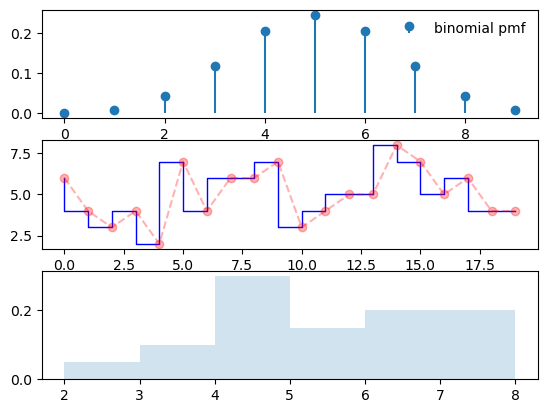

In [83]:
# Caso 1: Moneda legal (p = q = 0.5, N = 10)

"""
Definición de la VA binomial: M ~ Bin(n,p)

M: Salida de la moneda (S = Cara [H]; F = Sello [F])
- n: 10
- p: 0.5
- q: 0.5
"""
p_H = 0.5
lanzamientos = 10
M = stats.binom(n = lanzamientos, p = p_H)

# Grafica
fig, (ax1, ax2, ax3) = plt.subplots(3)
m = np.linspace(M.pmf(0.01), M.ppf(0.99), 10) #
ax1.stem(m, M.pmf(m),label='binomial pmf', basefmt=" ")

# Simulación
N = 20 # Numero de corridas (Simulaciones)
coin_experiments = M.rvs(size=N)
print(coin_experiments)

# Grafica de los numeros aleatorios generados
ax2.step(coin_experiments,'b-', lw=1) 
ax2.plot(coin_experiments, 'o--', color='red', alpha=0.3)

# Histograma
ax3.hist(coin_experiments, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax1.legend(loc='best', frameon=False)

plt.show()


Salidas del experimento (Numero de caras resultantes tras los 10 lanzamientos)
[7 5 2 6 7 6 4 7 6 5 8 7 9 7 6 7 2 8 8 5]


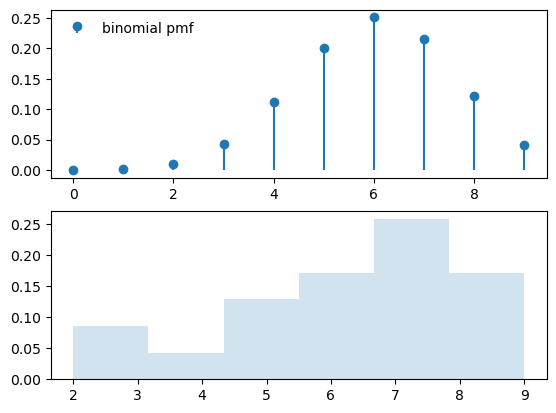

In [93]:
# Caso 2: Moneda cargada (p = 0.7, q = 0.3, N = 10)

"""
Definición de la VA binomial: M ~ Bin(n,p)

M: Salida de la moneda (S = Cara [H]; F = Sello [F])
- n: 10
- p: 0.6
- q: 0.4
"""
p_H = 0.6
lanzamientos = 10
M = stats.binom(n = lanzamientos, p = p_H)

# Grafica
fig, (ax1, ax2) = plt.subplots(2)
m = np.linspace(M.pmf(0.01), M.ppf(0.99), 10) #
ax1.stem(m, M.pmf(m),label='binomial pmf', basefmt=" ")

# Simulación
N = 20 # Numero de corridas (Simulaciones)
coin_experiments = M.rvs(size=N)
print("Salidas del experimento (Numero de caras resultantes tras los 10 lanzamientos)")
print(coin_experiments)

# Histograma
ax2.hist(coin_experiments, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax1.legend(loc='best', frameon=False)

plt.show()




Suponga que usted se encuentra esperando un bus como se ilustra en la siguiente figura:

![ejemplo](ejemplo_Poisson.png)

Los pasajeros llegan a un taza $\lambda$ por unidad de tiempo, de modo que para un tiempo $t$ el promedio de personas que llegan es de $\alpha = \mu = \lambda T$. Sea $N$ una variable que denota el numero de personas que llegan, podemos asumir que $N \sim Poisson(\alpha)$. Suponda que llegan 2 pasajeros cada un minuto. Cual es la PMD para un tiempo de 3 minutos.

**Solución**: Se hará la simulación empleando una distribución de Poisson ([scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html))

[ 6  3  5  5  6  7  8  7  6  4  6  6  5  8  8  5  3 10  6  5  7  3  7  7
  6  8  6  8  4  7  6  5  7  6  5  7  7  7  6  3  6  6  9  5  7  5  7  6
  8  5]


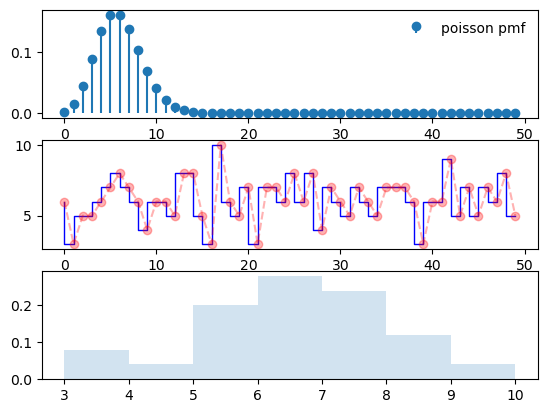

In [113]:

"""
Definición de la VA Poisson: N ~ Poisson(alpha)

N: Numero de pasajeros que llegan en un periodo de 3 minutos

# Parametros
lambda = 2
T = 3
a = lambda*T = 6 (alpha)
"""
a = 6
N = stats.poisson(mu = a)

# Grafica
fig, (ax1, ax2, ax3) = plt.subplots(3)
n = np.arange(0,50) #
ax1.stem(n, N.pmf(n),label='poisson pmf', basefmt=" ")

# Simulación
N = 50 # Numero de corridas (Simulaciones)
num_pasajeros = M.rvs(size=N)
print(num_pasajeros)

# Grafica de los numeros aleatorios generados
ax2.step(num_pasajeros,'b-', lw=1) 
ax2.plot(num_pasajeros, 'o--', color='red', alpha=0.3)

# Histograma
ax3.hist(num_pasajeros, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax1.legend(loc='best', frameon=False)

plt.show()


## Procesos estocasticos

Links:
* https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/tree/master/Chapter03
* https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/tree/master/Chapter05
* https://github.com/NikosNikolopoulos/StochasticProcesses
* https://ipython-books.github.io/1.31-simulating-a-discrete-time-markov-chain/
* https://setosa.io/ev/markov-chains/
* https://github.com/NikosNikolopoulos/StochasticProcesses
* https://www.cs.bu.edu/fac/crovella/cs132-book/L11MarkovChains.html
* https://github.com/sukruc/statistical-simulation/blob/master/Gambler's%20Ruin.ipynb


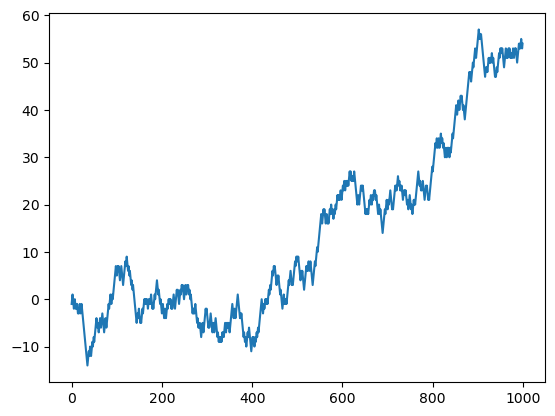

In [116]:
# https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/blob/master/Chapter05/RandomWalkSimulation.py
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
RWPath = list()
RWPath.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
	ZNValue = -1 if random() < 0.5 else 1
	XNValue = RWPath[i-1] + ZNValue
	RWPath.append(XNValue)
pyplot.plot(RWPath)
pyplot.show()

Weather initial condition = Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Rainy
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Sunny
Sunny
Sunny
Rainy
Rainy
Sunny
Sunny
Rainy
Sunny
Sunny
Sunny
Rainy


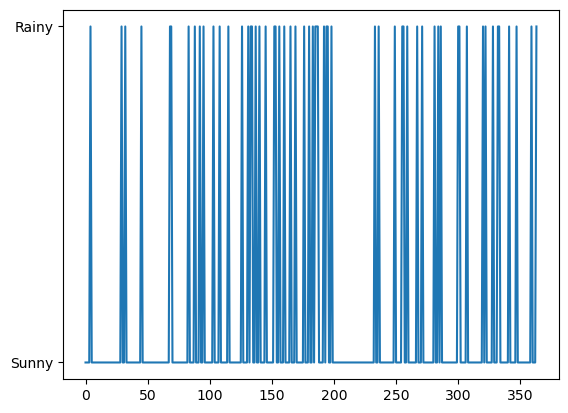

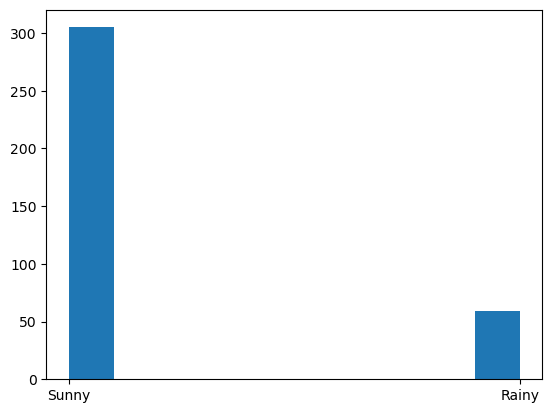

In [117]:
# URL: https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/blob/master/Chapter05/WeatherForecast.py
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(3)
StatesData = ["Sunny","Rainy"]

TransitionStates = [["SuSu","SuRa"],["RaRa","RaSu"]]
TransitionMatrix = [[0.80,0.20],[0.25,0.75]]


WeatherForecasting = list()
NumDays = 365
TodayPrediction = StatesData[0]

print("Weather initial condition =",TodayPrediction)


for i in range(1, NumDays):
    
    if TodayPrediction == "Sunny":        
        TransCondition = np.random.choice(TransitionStates[0],replace=True,p=TransitionMatrix[0])
        if TransCondition == "SuSu":
            pass
        else:
            TodayPrediction = "Rainy"


            
    elif TodayPrediction == "Rainy":
        TransCondition = np.random.choice(TransitionStates[1],replace=True,p=TransitionMatrix[1])
        if TransCondition == "RaRa":
            pass
        else:
            TodayPrediction = "Sunny"

            
    WeatherForecasting.append(TodayPrediction) 
    print(TodayPrediction)


plt.plot(WeatherForecasting)
plt.show()

plt.figure()
plt.hist(WeatherForecasting)
plt.show()

## Referencias

1. https://www.educative.io/answers/how-to-find-the-coin-toss-probability-in-python
2. https://dlsun.github.io/symbulate/mc.html#poisson
3. https://medium.com/geekculture/how-to-simulate-coin-flips-using-binomial-distribution-in-python-165aae7daf22
4. https://github.com/Apress/python-data-analytics-2e
5. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition
6. http://rstudio-pubs-static.s3.amazonaws.com/387683_9fdcc9657bb64526870506a70c966e08.html
7. https://scipy-lectures.org/packages/statistics/index.html
8. https://github.com/PacktPublishing/Python-for-Data-Analysis-step-by-step-with-projects-
9. https://github.com/krzjoa/awesome-python-data-science
9. https://dlsun.github.io/symbulate/index.html
10. https://github.com/PacktPublishing/Hands-On-Simulation-Modeling-with-Python/tree/master/Chapter05